In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, 
#non-linear technique primarily used for data exploration and visualizing high-dimensional data.
from sklearn.manifold import TSNE

#### What is the difference between Word2Vec and Glove?

Word2Vec takes texts as training data for a neural network. The resulting embedding captures whether words appear 
in similar contexts. GloVe focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities
that two words appear together.

### Download word vectors

In [3]:
#https://code.google.com/archive/p/word2vec/   
import gensim.downloader as api
word2vec_model=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
#Check Vector representation of any word

Sun_matrix=word2vec_model['Sun']
Sun_matrix

array([-0.27929688,  0.12988281, -0.03613281, -0.25585938,  0.12695312,
        0.07763672,  0.265625  ,  0.23828125, -0.14550781,  0.04223633,
       -0.21191406,  0.21777344,  0.17480469,  0.04858398, -0.24121094,
       -0.05810547,  0.046875  , -0.17089844, -0.17382812, -0.01745605,
       -0.07666016, -0.00613403,  0.06738281, -0.04736328,  0.2578125 ,
        0.32226562,  0.12792969,  0.3671875 , -0.0390625 , -0.06396484,
        0.29296875,  0.04150391, -0.04272461, -0.13671875,  0.10498047,
       -0.14160156,  0.01098633,  0.421875  , -0.12304688,  0.23730469,
        0.18652344, -0.4921875 , -0.17285156, -0.01446533,  0.34765625,
        0.06640625, -0.09082031, -0.29296875,  0.01141357,  0.20117188,
        0.31835938,  0.00805664, -0.0546875 ,  0.13085938, -0.20019531,
        0.13476562, -0.07470703, -0.12304688,  0.05712891, -0.2578125 ,
        0.16601562,  0.17871094,  0.13476562,  0.15917969,  0.05444336,
        0.05615234, -0.03833008,  0.16210938, -0.19140625,  0.30

In [7]:
Sun_matrix.shape

(300,)

In [8]:
word2vec_model['Google']

array([ 0.125     , -0.12402344, -0.13769531,  0.13085938, -0.39453125,
       -0.07666016,  0.15234375,  0.12792969,  0.16894531, -0.13964844,
       -0.02636719,  0.09375   ,  0.12890625, -0.10009766, -0.171875  ,
        0.07421875,  0.35742188, -0.09228516, -0.03076172, -0.07958984,
       -0.10693359,  0.07910156, -0.05615234,  0.06884766, -0.22070312,
       -0.15820312,  0.16503906,  0.06445312,  0.17285156,  0.13867188,
       -0.265625  ,  0.06542969, -0.17382812, -0.16210938, -0.0067749 ,
       -0.0625    ,  0.04833984,  0.14453125,  0.27929688,  0.49023438,
        0.11083984,  0.05810547,  0.10742188,  0.20996094, -0.06982422,
        0.08398438, -0.28515625, -0.00335693, -0.09375   , -0.12792969,
        0.04443359,  0.05151367, -0.29296875, -0.07470703, -0.11572266,
        0.23925781, -0.25195312,  0.0168457 , -0.09667969, -0.09228516,
       -0.02722168, -0.13867188, -0.00830078,  0.19628906, -0.5859375 ,
       -0.15332031, -0.26367188,  0.01672363, -0.22558594,  0.15

In [9]:
#print similar words
word2vec_model.most_similar('boy')

[('girl', 0.8543272018432617),
 ('teenager', 0.7606689929962158),
 ('toddler', 0.7043969035148621),
 ('teenage_girl', 0.685148298740387),
 ('man', 0.6824870705604553),
 ('teen_ager', 0.6499968767166138),
 ('son', 0.6337764263153076),
 ('kid', 0.63228440284729),
 ('youngster', 0.618381679058075),
 ('stepfather', 0.5989423394203186)]

In [10]:
word2vec_model.most_similar('Sun')

[('Robert_Tychkowski_Edmonton', 0.6324338316917419),
 ('Communities_SUI', 0.6245030760765076),
 ('PRANAY_GUPTE_Special', 0.6178733706474304),
 ('No_Child_Nilaja', 0.6127474904060364),
 ('TERRY_DAVIDSON_Toronto', 0.6056138277053833),
 ('CHRIS_DOUCETTE_Toronto', 0.602268397808075),
 ('Hours_Tues.', 0.6016443967819214),
 ('PAUL_TURENNE_Winnipeg', 0.5997726917266846),
 ('TJ_MADIGAN_Calgary', 0.5984655618667603),
 ('hijacked_airliner_belongs', 0.5983020067214966)]

### Analogy

In [13]:
#queen - girl + boy = king
word2vec_model.most_similar(positive=['queen','boy'],negative=['girl'],topn=2)

[('king', 0.7298423051834106), ('queens', 0.6158192753791809)]

### Visualization 

In [26]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange","rabbit","elephant","lion","tiger"]



labels=[]
wordvecs=[]
for word in vocab:
    wordvecs.append(word2vec_model[word])
    labels.append(word)
        

tsne_model=TSNE(perplexity=3,n_components=2,init='pca',random_state=2)
coordinates=tsne_model.fit_transform(wordvecs)

In [27]:
coordinates

array([[-129.44728 ,   68.18321 ],
       [-111.00228 ,   79.12165 ],
       [-111.25126 ,   39.448368],
       [ -94.1613  ,   53.41951 ],
       [-212.78085 ,   62.476437],
       [-208.48059 ,   80.84656 ],
       [ 301.12247 ,   32.20272 ],
       [ 308.77945 ,   79.59734 ],
       [ 277.70566 ,   47.02124 ],
       [ 287.1559  ,   72.49564 ],
       [ 272.04376 ,   22.669256],
       [ 337.28668 ,   55.56212 ],
       [-100.57981 ,  -82.05906 ],
       [-106.11558 , -122.372345],
       [ -76.9665  ,  -93.910706],
       [-114.37377 , -103.5477  ]], dtype=float32)

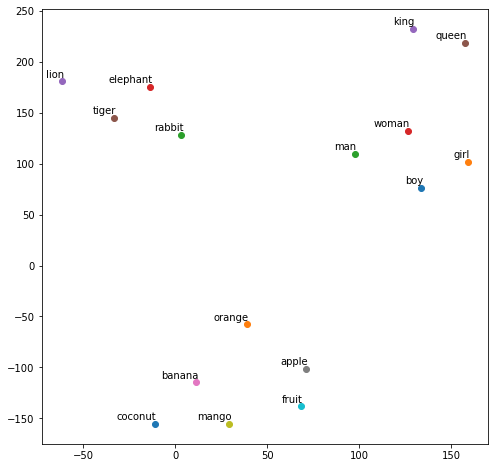

In [40]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange","rabbit","elephant","lion","tiger"]


def tsne_plot(model):
    labels=[]
    wordvecs=[]
    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
        
    tsne_model=TSNE(perplexity=5,n_components=2,init='pca',random_state=2)
    #The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    coordinates=tsne_model.fit_transform(wordvecs)
    
    x=[]
    y=[]
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

        
        
tsne_plot(word2vec_model)